# 공공 인공지능 Open API 활용

In [1]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [2]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [3]:
import os
img_file = 'images/주연.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [4]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [5]:
with open(img_file, 'rb') as file:
    image_contents =  base64.b64encode(file.read()).decode("utf8")

In [6]:
requestJson = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
}

In [7]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)

In [8]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [9]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.997036","x":"30","y":"17","width":"301","height":"488"}]}}'

In [10]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.997036',
    'x': '30',
    'y': '17',
    'width': '301',
    'height': '488'}]}}

In [11]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'person',
 'confidence': '0.997036',
 'x': '30',
 'y': '17',
 'width': '301',
 'height': '488'}

## 시각화

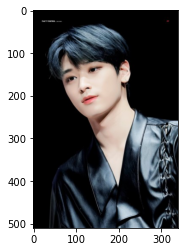

In [14]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [15]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])  #'x':'48' 스트링이기 때문에 int로
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(25,0,0)) #color code, fill wiht red
draw.rectangle(((x,y), (x+w, y+h)), outline=(225,0,0), width=2)

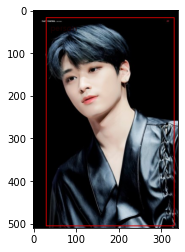

In [16]:
plt.imshow(image)
plt.show()

In [17]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)

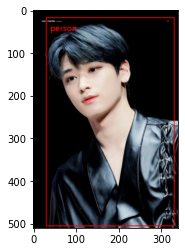

In [18]:
plt.imshow(image)
plt.show()